In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import analysis_tools_nonLin_June17 as temp_tools
import pickle
import matplotlib as mpl

# mpl.rcParams.update({
#     # Figure
#     'figure.figsize': (3.375, 2.5),  # PRL single-column
#     'figure.dpi': 300,
#     'figure.autolayout': False,
#     'savefig.bbox': 'tight',
#     'savefig.pad_inches': 0.02,
    
#     # Fonts
#     'font.size': 8,
#     'axes.labelsize': 8,
#     'axes.titlesize': 8,
#     'xtick.labelsize': 7,
#     'ytick.labelsize': 7,
#     'legend.fontsize': 7,
#     'legend.title_fontsize': 7,
#     'font.family': 'sans-serif',
#     'font.sans-serif': ['Helvetica', 'Arial', 'DejaVu Sans'],

#     # Axes
#     'axes.linewidth': 0.5,
#     'axes.spines.top': False,
#     'axes.spines.right': False,

#     # Ticks
#     'xtick.direction': 'in',
#     'ytick.direction': 'in',
#     'xtick.major.size': 2.5,
#     'ytick.major.size': 2.5,
#     'xtick.major.width': 0.5,
#     'ytick.major.width': 0.5,

#     # Lines and patches
#     'lines.linewidth': 1,
#     'lines.markersize': 4,

#     # Legend
#     'legend.frameon': False,

#     # Color cycle (custom PRL-style)
#     'axes.prop_cycle': mpl.cycler(color=[
#     "#377eb8",  # blue
#     "#e41a1c",  # red
#     "#4daf4a",  # green
#     "#984ea3",  # purple
#     "#ff7f00",  # orange
#     "#a65628",  # brown
#     "#f781bf",  # pink
#     "#999999",  # gray
#     "#66c2a5",  # cyan-teal
#     "#fc8d62",  # coral
#     "#8da0cb",  # indigo
# ])
# })
# def savefig_tight(name):
#     plt.savefig(name, bbox_inches='tight', pad_inches=0.05)



In [2]:
data_folder = 'rabi_tomography_data_Jun272025/'
init_states, amplitudes, column_headers, data_dict = temp_tools.read_data_generate_dict(data_folder)
flattop_gauss_amp=0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1*flattop_gauss_amp)
0.236/a_to_J

Initial states: ['-x', '-y', 'e', 'f', 'x', 'y']
Amplitudes: ['0.0000703', '0.0001000', '0.0003000', '0.0005000', '0.0007193', '0.0010000', '0.0015000', '0.0050000', '0.0100000', '0.0300000']
Column Headers: {'P_e_y', 'P_g_y', 'P_g_z', 'P_f_x', 'P_f_z', 'time', 'P_f_y', 'P_e_x', 'P_e_z', 'P_g_x'}


0.0007034297834491154

In [3]:
# Convert amplitudes to floats if not already
# amp_vals = np.array([float(a) for a in amplitudes])
# J_vals = a_to_J * amp_vals

# # Target J values to match
# plot_Js = [1.7, 0.24, 0.17, 0.10, 0.03]

# # Find closest matching amplitudes
# plot_amps = []
# for target_J in plot_Js:
#     idx = (np.abs(J_vals - target_J)).argmin()
#     plot_amps.append(amplitudes[idx])

# print("plot_amps =", plot_amps)


In [3]:
density_dict = {}

for state in init_states:
    density_dict[state] = {}
    for amp in amplitudes:
        # if amp in plot_amps:
        df = data_dict[state][amp]['scaled']
        # time = df['time'].to_numpy()
        time,rhos, eigvals, psis, rhos_p, exp_x_pure, exp_y_pure, exp_z_pure = temp_tools.reconstruct_density_matrices_2_2_from_data_dict_pure_state(df)

        

        # Store all in dictionary
        density_dict[state][amp] = {
            'time': time, 
            'rho': rhos,
            'psis': psis,
            'exp_x_pure': exp_x_pure,
            'exp_y_pure': exp_y_pure,
            'exp_z_pure': exp_z_pure,

        }

In [4]:
# target_states = {"-x", "x", "y", "-y","e","f"}

# def to_float(v):
#     try:
#         return float(v)
#     except Exception:
#         # if amp keys are strings like "0.120", handle gracefully
#         return float(str(v).strip())

# # how many decimals to round J to when using as dict keys (avoid float-key noise)
# J_PREC = 9

# filtered_dict = {}
# for state in density_dict:
#     if state not in target_states:
#         continue

#     # Build a {J: {...}} dict for this state
#     J_map = {}
#     for amp, rec in density_dict[state].items():
#         amp_f = to_float(amp)
#         J = round(amp_f * a_to_J, J_PREC)

#         J_map[J] = {
#             "time":    rec["time"],
#             "exp_x_pure": rec["exp_x_pure"],
#             "exp_y_pure": rec["exp_y_pure"],
#             "exp_z_pure": rec["exp_z_pure"],
#         }

#     # (optional) sort inner dict by J
#     filtered_dict[state] = {k: J_map[k] for k in sorted(J_map)}

In [5]:
# list(filtered_dict["x"].keys())[:5]

In [6]:
# import pandas as pd
# from pathlib import Path

# output_folder = Path("exported_csvs")
# output_folder.mkdir(exist_ok=True)

# for state, J_map in filtered_dict.items():
#     for J, rec in J_map.items():
#         # build DataFrame
#         df = pd.DataFrame({
#             "time": rec["time"],
#             "exp_x_pure": rec["exp_x_pure"],
#             "exp_y_pure": rec["exp_y_pure"],
#             "exp_z_pure": rec["exp_z_pure"],
#         })

#         # format filename: init_<state>_<J>.csv, with J rounded to 3 decimals
#         filename = f"init_{state}_{J:.3f}.csv"
#         filepath = output_folder / filename

#         df.to_csv(filepath, index=False)

# print("All CSVs saved to", output_folder.resolve())

In [64]:
# def _row_norm(a): 
#     return np.linalg.norm(a, axis=1)

# def consecutive_overlap_abs(vecs: np.ndarray) -> np.ndarray:
#     """Return |<v_t|v_{t-1}>| for t>=1; put 1.0 at t=0.  vecs shape (N,2)."""
#     N = vecs.shape[0]
#     ov = np.ones(N, dtype=float)
#     if N <= 1:
#         return ov
#     v_prev = vecs[:-1]
#     v_curr = vecs[1:]
#     ov[1:] = np.abs(np.einsum('ij,ij->i', np.conjugate(v_curr), v_prev))
#     return ov
# def build_phi_filtered_x(psi_e, psi_f, time,state: str,filter1,filter2):
#     """
#     1) Compute φ_t and F_t on the full dataset of length T.
#     2) Drop all t with F_t < 0.94 → idx1
#     3) Re-build φ / F on that reduced subset
#     4) Drop all of those with F < 0.90 → idx2
#     Returns:
#       time2:   np.ndarray of surviving times
#       phi2:    np.ndarray shape (N2,2) of surviving superpositions
#       F2:      np.ndarray length N2 of surviving overlaps
#       idx2:    tuple of original indices kept
#     """
#     psi_e = np.asarray(psi_e)
#     psi_f = np.asarray(psi_f)

#     T = psi_e.shape[0]

#     # --- first pass on full data ---
#     phi1 = np.zeros_like(psi_e, dtype=np.complex128)
#     F1   = [1.0]

#     # t=0
#     raw0 = (psi_e[0] + (1j if state=="-x" else -1j)*psi_f[0]) / np.sqrt(2)
#     phi1[0] = raw0  / np.linalg.norm(raw0)if np.linalg.norm(raw0) else raw0

#     # t=1..T-1
#     for t in range(1, T):
#         prev = phi1[t-1]
#         plus_raw  = (psi_e[t] + 1j*psi_f[t]) / np.sqrt(2)
#         minus_raw = (psi_e[t] - 1j*psi_f[t]) / np.sqrt(2)

#         # normalized candidates
#         phi_p = plus_raw    / np.linalg.norm(plus_raw)if np.linalg.norm(plus_raw)  else plus_raw
#         phi_m = minus_raw / np.linalg.norm(minus_raw)if np.linalg.norm(minus_raw) else minus_raw

#         # overlaps
#         F_p = abs(np.vdot(prev, phi_p))
#         F_m = abs(np.vdot(prev, phi_m))

#         if F_p >= F_m:
#             phi1[t], F1_t = phi_p, F_p
#         else:
#             phi1[t], F1_t = phi_m, F_m

#         F1.append(F1_t)

#     F1 = np.array(F1)

#     # first filter: keep F ≥ 0.94
#     idx1 = np.where(F1 >= filter1)[0]
#     psi_e1, psi_f1, time1 = psi_e[idx1], psi_f[idx1], time[idx1]

#     # --- second pass on reduced data ---
#     N1 = len(idx1)
#     phi2 = np.zeros((N1, psi_e.shape[1]), dtype=np.complex128)
#     F2   = [1.0]

#     # re-init φ at the first reduced point
#     raw0 = (psi_e1[0] + (1j if state=="-x" else -1j)*psi_f1[0]) / np.sqrt(2)
#     phi2[0] = raw0 / np.linalg.norm(raw0) if np.linalg.norm(raw0) else raw0

#     for k in range(1, N1):
#         prev = phi2[k-1]
#         plus_raw  = (psi_e1[k] + 1j*psi_f1[k]) / np.sqrt(2)
#         minus_raw = (psi_e1[k] - 1j*psi_f1[k]) / np.sqrt(2)

#         phi_p = plus_raw  / np.linalg.norm(plus_raw)  if np.linalg.norm(plus_raw)  else plus_raw
#         phi_m = minus_raw / np.linalg.norm(minus_raw) if np.linalg.norm(minus_raw) else minus_raw

#         F_p = abs(np.vdot(prev, phi_p))
#         F_m = abs(np.vdot(prev, phi_m))

#         if F_p >= F_m:
#             phi2[k], F2_t = phi_p, F_p
#         else:
#             phi2[k], F2_t = phi_m, F_m

#         F2.append(F2_t)

#     F2 = np.array(F2)

#     # second filter: keep F ≥ 0.90
#     idx2_rel = np.where(F2 >= filter2)[0]
#     idx2     = idx1[idx2_rel]                   # map back to original indices
#     phi2_f   = phi2[idx2_rel]
#     F2_f     = F2[idx2_rel]


    
#     # print(F2_f )
#     return phi2_f, F2_f, idx2
# import numpy as np

# def _row_normalize(a: np.ndarray) -> np.ndarray:
#     out = a.astype(np.complex128, copy=True)
#     n = np.linalg.norm(out, axis=1, keepdims=True)
#     nz = (n[:,0] > 0)
#     out[nz] /= n[nz]
#     return out

# def _ofs_series(phi: np.ndarray, ref_phi: np.ndarray) -> np.ndarray:
#     """OFS(t) = |<ref_phi(t)|phi(t)>| for arrays of shape (T,2)."""
#     return np.abs(np.einsum('ij,ij->i', np.conjugate(ref_phi), phi))

# def build_phi_filtered_x(psi_e, psi_f, time, state: str, filter1, ref_phi):
#     """
#     Single-pass version:
#       - At each t choose the branch (+i or -i) that maximizes OFS with ref_phi[t].
#       - Build OFS(t) = |<ref_phi[t] | phi_t>|.
#       - Keep indices where |OFS[t] - OFS[t-1]| <= filter1  (always keep the first kept index).

#     Returns:
#       phi_f  : (N,2) filtered φ_t
#       ofs_f  : (N,)   filtered OFS(t)
#       idx_f  : (N,)   kept indices into the ORIGINAL timeline
#     """
#     psi_e = np.asarray(psi_e)
#     psi_f = np.asarray(psi_f)
#     ref_phi = np.asarray(ref_phi)

#     pe = _row_normalize(psi_e)
#     pf = _row_normalize(psi_f)
#     rphi = _row_normalize(ref_phi)

#     T = pe.shape[0]
#     if T == 0:
#         return np.empty((0,2), complex), np.array([]), np.array([], dtype=int)

#     # --- choose branch by maximizing OFS with ref_phi[t] ---
#     phi = np.zeros_like(pe, dtype=np.complex128)

#     # t = 0 (match your original -x/x convention)
#     raw0 = (pe[0] + (1j if state == "-x" else -1j) * pf[0]) / np.sqrt(2)
#     n0 = np.linalg.norm(raw0)
#     phi[0] = raw0 if n0 == 0 else raw0 / n0

#     for t in range(1, T):
#         plus_raw  = (pe[t] + 1j * pf[t]) / np.sqrt(2)
#         minus_raw = (pe[t] - 1j * pf[t]) / np.sqrt(2)
#         np1 = np.linalg.norm(plus_raw);  nm1 = np.linalg.norm(minus_raw)
#         phi_p = plus_raw  if np1 == 0 else plus_raw  / np1
#         phi_m = minus_raw if nm1 == 0 else minus_raw / nm1

#         # choose the branch that maximizes OFS with ref_phi[t]
#         ofs_p = np.abs(np.vdot(rphi[t], phi_p))
#         ofs_m = np.abs(np.vdot(rphi[t], phi_m))
#         phi[t] = phi_p if ofs_p >= ofs_m else phi_m

#     # --- build OFS and apply ΔOFS threshold ---
#     ofs = _ofs_series(phi, rphi)
#     dofs = np.zeros_like(ofs)
#     dofs[1:] = np.abs(ofs[1:] - ofs[:-1])

#     idx_keep = np.where(dofs <= float(filter1))[0]
#     if idx_keep.size == 0 or idx_keep[0] != 0:
#         idx_keep = np.insert(idx_keep, 0, 0)  # always keep the first point

#     phi_f = phi[idx_keep]
#     ofs_f = ofs[idx_keep]
#     idx_f = idx_keep

#     return phi_f, ofs_f, idx_f

def _row_normalize(a: np.ndarray) -> np.ndarray:
    out = a.astype(np.complex128, copy=True)
    n = np.linalg.norm(out, axis=1, keepdims=True)
    nz = (n[:,0] > 0)
    out[nz] /= n[nz]
    return out

def _ofs_series(phi: np.ndarray, ref_phi: np.ndarray) -> np.ndarray:
    """OFS(t) = |<ref_phi(t) | phi(t)>| ; inputs are (N,2)."""
    # normalize both to make the metric comparable
    phi_n   = _row_normalize(phi)
    ref_n   = _row_normalize(ref_phi)
    return np.abs(np.einsum('ij,ij->i', np.conjugate(ref_n), phi_n)) 
def build_phi_filtered_x(psi_e, psi_f, time, state: str, filter1, filter2, ref_phi):
    """
    Same outputs/shape as your original, but filtering is now by OFS jumps
    w.r.t. ref_phi: keep frames where |OFS[t]-OFS[t-1]| <= filterX.

    Returns:
      phi2_f : (N2,2) surviving φ on the reduced timeline
      ofs2_f : (N2,)  surviving OFS values (φ vs ref_phi)
      idx2   : indices into the ORIGINAL timeline that survived
    """
    psi_e  = np.asarray(psi_e); psi_f = np.asarray(psi_f); ref_phi = np.asarray(ref_phi)
    pe     = _row_normalize(psi_e)
    pf     = _row_normalize(psi_f)
    rphi   = _row_normalize(ref_phi)
    T      = pe.shape[0]
    if T == 0:
        return np.empty((0,2), complex), np.array([]), np.array([], dtype=int)

    # ---------- pass 1 on full data ----------
    phi1 = np.zeros_like(pe, dtype=np.complex128)
    # t=0 (match your convention: -x => +i ; x/ +x => -i)
    raw0 = (pe[0] + (1j if state == "-x" else -1j) * pf[0]) / np.sqrt(2)
    n0   = np.linalg.norm(raw0)
    phi1[0] = raw0 if n0 == 0 else raw0 / n0

    for t in range(1, T):
        prev      = phi1[t-1]
        plus_raw  = (pe[t] + 1j * pf[t]) / np.sqrt(2)
        minus_raw = (pe[t] - 1j * pf[t]) / np.sqrt(2)
        np1 = np.linalg.norm(plus_raw);   nm1 = np.linalg.norm(minus_raw)
        phi_p = plus_raw  if np1 == 0 else plus_raw  / np1
        phi_m = minus_raw if nm1 == 0 else minus_raw / nm1
        Fp = abs(np.vdot(prev, phi_p));  Fm = abs(np.vdot(prev, phi_m))
        phi1[t] = phi_p if Fp >= Fm else phi_m

    ofs1  = _ofs_series(phi1, rphi)
    dofs1 = np.zeros_like(ofs1); dofs1[1:] = np.abs(ofs1[1:] - ofs1[:-1])

    idx1 = np.where(dofs1 <= float(filter1))[0]
    if 0 not in idx1:
        idx1 = np.insert(idx1, 0, 0)  # always keep t=0

    pe1, pf1, rphi1 = pe[idx1], pf[idx1], rphi[idx1]

    # ---------- pass 2 on reduced data ----------
    N1   = len(idx1)
    phi2 = np.zeros((N1, pe.shape[1]), dtype=np.complex128)

    raw0 = (pe1[0] + (1j if state == "-x" else -1j) * pf1[0]) / np.sqrt(2)
    n0   = np.linalg.norm(raw0)
    phi2[0] = raw0 if n0 == 0 else raw0 / n0

    for k in range(1, N1):
        prev      = phi2[k-1]
        plus_raw  = (pe1[k] + 1j * pf1[k]) / np.sqrt(2)
        minus_raw = (pe1[k] - 1j * pf1[k]) / np.sqrt(2)
        np2 = np.linalg.norm(plus_raw);   nm2 = np.linalg.norm(minus_raw)
        phi_p = plus_raw  if np2 == 0 else plus_raw  / np2
        phi_m = minus_raw if nm2 == 0 else minus_raw / nm2
        Fp = abs(np.vdot(prev, phi_p));  Fm = abs(np.vdot(prev, phi_m))
        phi2[k] = phi_p if Fp >= Fm else phi_m

    ofs2  = _ofs_series(phi2, rphi1)
    dofs2 = np.zeros_like(ofs2); dofs2[1:] = np.abs(ofs2[1:] - ofs2[:-1])

    idx2_rel = np.where(dofs2 <= float(filter2))[0]
    if 0 not in idx2_rel:
        idx2_rel = np.insert(idx2_rel, 0, 0)

    idx2   = idx1[idx2_rel]     # map back to original indices
    phi2_f = phi2[idx2_rel]
    ofs2_f = ofs2[idx2_rel]

    return phi2_f, ofs2_f, idx2
def build_phi_filtered_y(psi_e, psi_f, time, state: str, filter1, filter2, ref_phi):
    """
    Same as the X version, but -y => +1 ; y/+y => -1 combination.
    """
    psi_e  = np.asarray(psi_e); psi_f = np.asarray(psi_f); ref_phi = np.asarray(ref_phi)
    pe     = _row_normalize(psi_e)
    pf     = _row_normalize(psi_f)
    rphi   = _row_normalize(ref_phi)
    T      = pe.shape[0]
    if T == 0:
        return np.empty((0,2), complex), np.array([]), np.array([], dtype=int)

    # ---------- pass 1 ----------
    phi1 = np.zeros_like(pe, dtype=np.complex128)
    raw0 = (pe[0] + (1 if state == "-y" else -1) * pf[0]) / np.sqrt(2)
    n0   = np.linalg.norm(raw0)
    phi1[0] = raw0 if n0 == 0 else raw0 / n0

    for t in range(1, T):
        prev      = phi1[t-1]
        plus_raw  = (pe[t] + pf[t]) / np.sqrt(2)
        minus_raw = (pe[t] - pf[t]) / np.sqrt(2)
        np1 = np.linalg.norm(plus_raw);   nm1 = np.linalg.norm(minus_raw)
        phi_p = plus_raw  if np1 == 0 else plus_raw  / np1
        phi_m = minus_raw if nm1 == 0 else minus_raw / nm1
        Fp = abs(np.vdot(prev, phi_p));  Fm = abs(np.vdot(prev, phi_m))
        phi1[t] = phi_p if Fp >= Fm else phi_m

    ofs1  = _ofs_series(phi1, rphi)
    dofs1 = np.zeros_like(ofs1); dofs1[1:] = np.abs(ofs1[1:] - ofs1[:-1])
    idx1 = np.where(dofs1 <= float(filter1))[0]
    if 0 not in idx1:
        idx1 = np.insert(idx1, 0, 0)

    pe1, pf1, rphi1 = pe[idx1], pf[idx1], rphi[idx1]

    # ---------- pass 2 ----------
    N1   = len(idx1)
    phi2 = np.zeros((N1, pe.shape[1]), dtype=np.complex128)

    raw0 = (pe1[0] + (1 if state == "-y" else -1) * pf1[0]) / np.sqrt(2)
    n0   = np.linalg.norm(raw0)
    phi2[0] = raw0 if n0 == 0 else raw0 / n0

    for k in range(1, N1):
        prev      = phi2[k-1]
        plus_raw  = (pe1[k] + pf1[k]) / np.sqrt(2)
        minus_raw = (pe1[k] - pf1[k]) / np.sqrt(2)
        np2 = np.linalg.norm(plus_raw);   nm2 = np.linalg.norm(minus_raw)
        phi_p = plus_raw  if np2 == 0 else plus_raw  / np2
        phi_m = minus_raw if nm2 == 0 else minus_raw / nm2
        Fp = abs(np.vdot(prev, phi_p));  Fm = abs(np.vdot(prev, phi_m))
        phi2[k] = phi_p if Fp >= Fm else phi_m

    ofs2  = _ofs_series(phi2, rphi1)
    dofs2 = np.zeros_like(ofs2); dofs2[1:] = np.abs(ofs2[1:] - ofs2[:-1])

    idx2_rel = np.where(dofs2 <= float(filter2))[0]
    if 0 not in idx2_rel:
        idx2_rel = np.insert(idx2_rel, 0, 0)

    idx2   = idx1[idx2_rel]
    phi2_f = phi2[idx2_rel]
    ofs2_f = ofs2[idx2_rel]

    return phi2_f, ofs2_f, idx2

# def build_phi_filtered_y(psi_e, psi_f, time,state: str,filter1,filter2):
#     """
#     1) Compute φ_t and F_t on the full dataset of length T.
#     2) Drop all t with F_t < 0.94 → idx1
#     3) Re-build φ / F on that reduced subset
#     4) Drop all of those with F < 0.90 → idx2
#     Returns:
#       time2:   np.ndarray of surviving times
#       phi2:    np.ndarray shape (N2,2) of surviving superpositions
#       F2:      np.ndarray length N2 of surviving overlaps
#       idx2:    tuple of original indices kept
#     """
#     psi_e = np.asarray(psi_e)
#     psi_f = np.asarray(psi_f)

#     T = psi_e.shape[0]

#     # --- first pass on full data ---
#     phi1 = np.zeros_like(psi_e, dtype=np.complex128)
#     F1   = [1.0]

#     # t=0
#     raw0 = (psi_e[0] + (1 if state=="-y" else -1)*psi_f[0]) / np.sqrt(2)
#     phi1[0] = raw0 / np.linalg.norm(raw0) if np.linalg.norm(raw0) else raw0

#     # t=1..T-1
#     for t in range(1, T):
#         prev = phi1[t-1]
#         plus_raw  = (psi_e[t] + 1*psi_f[t]) / np.sqrt(2)
#         minus_raw = (psi_e[t] - 1*psi_f[t]) / np.sqrt(2)

#         # normalized candidates
#         phi_p = plus_raw  / np.linalg.norm(plus_raw)  if np.linalg.norm(plus_raw)  else plus_raw
#         phi_m = minus_raw / np.linalg.norm(minus_raw) if np.linalg.norm(minus_raw) else minus_raw

#         # overlaps
#         F_p = abs(np.vdot(prev, phi_p))
#         F_m = abs(np.vdot(prev, phi_m))

#         if F_p >= F_m:
#             phi1[t], F1_t = phi_p, F_p
#         else:
#             phi1[t], F1_t = phi_m, F_m

#         F1.append(F1_t)

#     F1 = np.array(F1)

#     # first filter: keep F ≥ 0.94
#     idx1 = np.where(F1 >= filter1)[0]
#     psi_e1, psi_f1, time1 = psi_e[idx1], psi_f[idx1], time[idx1]

#     # --- second pass on reduced data ---
#     N1 = len(idx1)
#     phi2 = np.zeros((N1, psi_e.shape[1]), dtype=np.complex128)
#     F2   = [1.0]

#     # re-init φ at the first reduced point
#     raw0 = (psi_e1[0] + (1 if state=="-y" else -1)*psi_f1[0]) / np.sqrt(2)
#     phi2[0] = raw0 / np.linalg.norm(raw0) if np.linalg.norm(raw0) else raw0

#     for k in range(1, N1):
#         prev = phi2[k-1]
#         plus_raw  = (psi_e1[k] + 1*psi_f1[k]) / np.sqrt(2)
#         minus_raw = (psi_e1[k] - 1*psi_f1[k]) / np.sqrt(2)

#         phi_p = plus_raw  / np.linalg.norm(plus_raw)  if np.linalg.norm(plus_raw)  else plus_raw
#         phi_m = minus_raw / np.linalg.norm(minus_raw) if np.linalg.norm(minus_raw) else minus_raw

#         F_p = abs(np.vdot(prev, phi_p))
#         F_m = abs(np.vdot(prev, phi_m))

#         if F_p >= F_m:
#             phi2[k], F2_t = phi_p, F_p
#         else:
#             phi2[k], F2_t = phi_m, F_m

#         F2.append(F2_t)

#     F2 = np.array(F2)

#     # second filter: keep F ≥ 0.90
#     idx2_rel = np.where(F2 >= filter2)[0]
#     idx2     = idx1[idx2_rel]                   # map back to original indices
#     phi2_f   = phi2[idx2_rel]
#     F2_f     = F2[idx2_rel]


    
#     # print(F2_f )
#     return phi2_f, F2_f, idx2
def compute_ofs(phi_ts, psi_x):
    """
    Args:
      phi_ts: array shape (T,2), as returned by build_phi()
      psi_x:  array shape (T,2), pure‐state vectors for initial |x>
    Returns:
      ofs: complex array shape (T,), the overlap at each t
    """

    
    
    # ⟨Φ|ψ⟩ = sum conj(phi) * psi along the second axis
    numer = np.einsum('ij,ij->i', np.conjugate(psi_x),phi_ts )
    # norm = √⟨ψ|ψ⟩  (should be 1 if psi_x was normalized)
    # norms = np.linalg.norm(psi_x, axis=1)
    return numer

def enforce_continuous_phase(psi_array: np.ndarray, comp: int = 1) -> np.ndarray:
    """
    Given psi_array of shape (T, 2), returns a new array psi_fixed
    where for each t:
      1) the comp-th component is made real and positive,
      2) the sign is chosen (±) to minimize the jump from psi_fixed[t-1].
    
    Args:
      psi_array: raw eigenvector series, shape (T,2), complex dtype
      comp:      which component to force real (0 or 1)
    
    Returns:
      psi_fixed: shape (T,2), smoothly phased
    """
    T, N = psi_array.shape
    psi_fixed = np.zeros_like(psi_array, dtype=complex)

    # t = 0: cancel phase of component `comp` and force it positive
    phi0 = np.angle(psi_array[0, comp])
    psi0 = psi_array[0] * np.exp(-1j * phi0)
    if np.real(psi0[comp]) < 0:
        psi0 = -psi0
    
    psi_fixed[0] = psi0

    # t = 1…T-1: cancel comp-phase, then pick sign minimizing jump
    for t in range(1, T):
        raw = psi_array[t]
        phi = np.angle(raw[comp])
        cand = raw * np.exp(-1j * phi)    # make comp real
        cand_neg = -cand                  # alternative sign

        prev = psi_fixed[t-1]
        d1 = np.linalg.norm(cand     - prev,ord=np.inf)
        d2 = np.linalg.norm(cand_neg - prev,ord=np.inf)

        psi_fixed[t] = cand if d1 < d2 else cand_neg

    return psi_fixed

In [8]:
# filtered_dict = {}
# F1=0.99
# F2=0.99
# for state in ["x","y","-x","-y"]:
#     # Build a {J: {...}} dict for this state
#     J_map = {}
#     for amp, rec in density_dict[state].items():
#         amp_f = to_float(amp)
#         J = round(amp_f * a_to_J, J_PREC)
#         psi_e = density_dict['e'][amp]['psis']
#         psi_f = density_dict['f'][amp]["psis"]   
#         psi = density_dict[state][amp]["psis"] 
#         time=density_dict[state][amp]["time"]
#         psi_e= enforce_continuous_phase(psi_e,0)
#         psi_f= enforce_continuous_phase(psi_f,1)
#         if state == '-x' or state == 'x':
#             phi_ts,F_plus,idx= build_phi_filtered_x(psi_e, psi_f,time,state,F1,F2)
#         elif state == '-y' or state == 'y':
#             phi_ts,F_plus,idx= build_phi_filtered_y(psi_e, psi_f,time,state,F1,F2)
#         time=time[idx]
#         sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
#         sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
#         sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
#         def exp_vals_from_psis(psis):
#             exp_x_list, exp_y_list, exp_z_list = [], [], []
#             for psi in psis:               # psi shape (2,)
#                 rho_pure = np.outer(psi, np.conj(psi))
#                 exp_x_list.append(np.trace(rho_pure @ sigma_x).real)
#                 exp_y_list.append(np.trace(rho_pure @ sigma_y).real)
#                 exp_z_list.append(np.trace(rho_pure @ sigma_z).real)
#             return (np.array(exp_x_list), np.array(exp_y_list), np.array(exp_z_list))

#         # Example usage:
#         exp_x_pure, exp_y_pure, exp_z_pure = exp_vals_from_psis(phi_ts)
#         J_map[J] = {
#             "time": time,
#             "exp_x_pure": exp_x_pure,
#             "exp_y_pure": exp_y_pure,
#             "exp_z_pure": exp_z_pure,
#         }
  
#     # (optional) sort inner dict by J
#     filtered_dict[state] = {k: J_map[k] for k in sorted(J_map)}

In [9]:
# import pandas as pd
# from pathlib import Path

# output_folder = Path("data for combination e and f")
# output_folder.mkdir(exist_ok=True)

# for state, J_map in filtered_dict.items():
#     for J, rec in J_map.items():
#         # build DataFrame
#         df = pd.DataFrame({
#             "time": rec["time"],
#             "exp_x_pure": rec["exp_x_pure"],
#             "exp_y_pure": rec["exp_y_pure"],
#             "exp_z_pure": rec["exp_z_pure"],
#         })

#         # format filename: init_<state>_<J>.csv, with J rounded to 3 decimals
#         filename = f"init_{state}_{J:.3f}.csv"
#         filepath = output_folder / filename

#         df.to_csv(filepath, index=False)

# print("All CSVs saved to", output_folder.resolve())

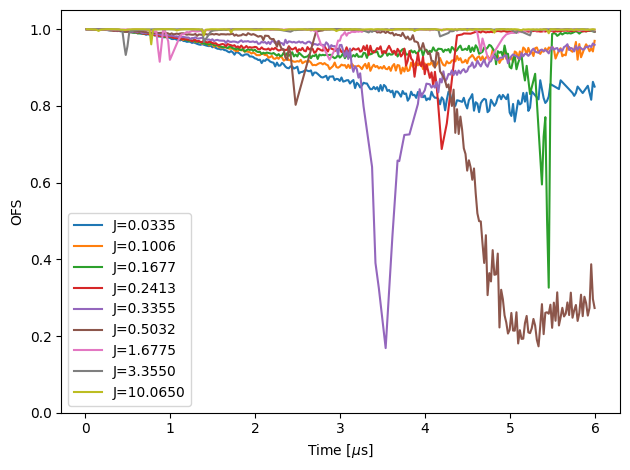

In [76]:
flattop_gauss_amp = 0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1 * flattop_gauss_amp)
F1=0.05
F2=1#0.05
state = "y"
results_dict = {}   # dictionary to hold all data for each J

for amp in amplitudes:
    if amp != '0.0000703':
        # F1 = results[amp]['F1']
        # F2 = results[amp]['F2']
    
        psi_e = density_dict['e'][amp]['psis']
        psi_f = density_dict['f'][amp]["psis"]   
        psi   = density_dict[state][amp]["psis"] 
        time  = density_dict[state][amp]["time"]

        psi_e = enforce_continuous_phase(psi_e,0)
        psi_f = enforce_continuous_phase(psi_f,1)

        if state in ['-x','x']:
            phi_ts, F_plus, idx = build_phi_filtered_x(psi_e, psi_f, time, state, F1, F2,psi)
        elif state in ['-y','y']:
            phi_ts, F_plus, idx = build_phi_filtered_y(psi_e, psi_f, time, state, F1, F2,psi)

        psi  = psi[idx]
        time = time[idx] / 1000   # convert to microseconds
        ofs  = compute_ofs(psi, phi_ts)  # drop frames where consecutive |<φ_t|φ_{t-1}>| is too small


        J_value = float(amp) * a_to_J
        # save into dictionary
        results_dict[J_value] = {
            "time": time,
            "fidelity": abs(ofs)
        }

        # still plot
        plt.plot(time, abs(ofs), label=f'J={J_value:.4f}')

plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('OFS')
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

In [78]:
import pandas as pd
from pathlib import Path

output_folder = Path("exported_OFS_csvs")
output_folder.mkdir(exist_ok=True)


for J, rec in results_dict.items():
    # build DataFrame
    df = pd.DataFrame({
        "time": rec["time"],
        "OFS": rec["fidelity"],
    })

    # format filename: init_<state>_<J>.csv, with J rounded to 3 decimals
    filename = f"init_-x_{J:.3f}.csv"
    filepath = output_folder / filename

    df.to_csv(filepath, index=False)

print("All CSVs saved to", output_folder.resolve())

All CSVs saved to C:\Users\quantum1\OneDrive\Documents\Python Scripts\Important Blue Fridge Python Files\New\OPX_setup_06022025\opx_github_scripts\exported_OFS_csvs


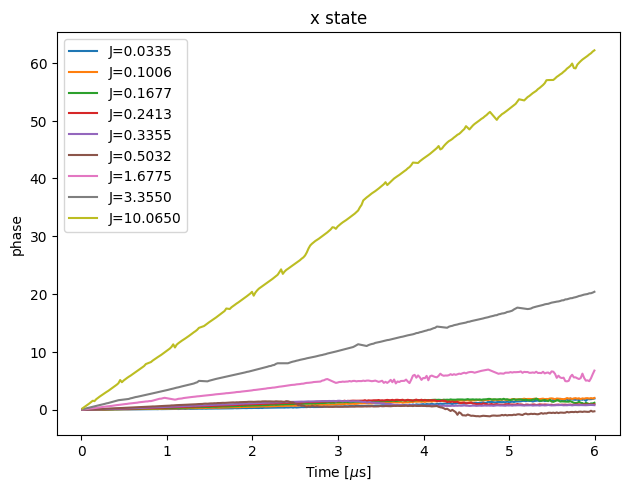

In [31]:
# flattop_gauss_amp = 0.1
# a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1 * flattop_gauss_amp)
# F1=0.99
# F2=0.99
# state = "-y"
# results_dict = {}   # dictionary to hold all data for each J

# for amp in amplitudes:
#     if amp != '0.0000703':
#         # F1 = results[amp]['F1']
#         # F2 = results[amp]['F2']
    
#         psi_e = density_dict['e'][amp]['psis']
#         psi_f = density_dict['f'][amp]["psis"]   
#         psi   = density_dict[state][amp]["psis"] 
#         time  = density_dict[state][amp]["time"]

#         psi_e = enforce_continuous_phase(psi_e,0)
#         psi_f = enforce_continuous_phase(psi_f,1)

#         if state in ['-x','x']:
#             phi_ts, F_plus, idx = build_phi_filtered_x(psi_e, psi_f, time, state, F1, F2)
#         elif state in ['-y','y']:
#             phi_ts, F_plus, idx = build_phi_filtered_y(psi_e, psi_f, time, state, F1, F2)

#         psi  = psi[idx]
#         time = time[idx] / 1000   # convert to microseconds
#         ofs  = compute_ofs(psi, phi_ts)

#         J_value = float(amp) * a_to_J
#         # save into dictionary
#         results_dict[J_value] = {
#             "time": time,
#             "fidelity": abs(ofs)
#         }

#         # still plot
#         plt.plot(time, np.unwrap(np.angle(ofs))/4, label=f'J={J_value:.4f}')

# plt.xlabel(r'Time [$\mu$s]')
# plt.ylabel('phase')
# # plt.ylim(-20, 0)
# plt.legend()
# plt.tight_layout()
# plt.title("x state")
# plt.show()

In [13]:
import pandas as pd
from pathlib import Path

output_folder = Path("pure state fidelity data")
output_folder.mkdir(exist_ok=True)


# after results_dict is created in the previous code
for J_value, data in results_dict.items():
    # make a DataFrame from time and fidelity arrays
    df = pd.DataFrame({
        "time": data["time"],
        "OFS": data["fidelity"]
    })
    
    # format J value with 4 decimal places (you can change if you prefer)
    filename = f"fidelity_pure_state_{J_value:.3f}.csv"
    filepath = output_folder / filename
    
    # save CSV
    df.to_csv(filepath, index=False)
    print(f"Saved {filepath}")

Saved pure state fidelity data\fidelity_pure_state_0.034.csv
Saved pure state fidelity data\fidelity_pure_state_0.101.csv
Saved pure state fidelity data\fidelity_pure_state_0.168.csv
Saved pure state fidelity data\fidelity_pure_state_0.241.csv
Saved pure state fidelity data\fidelity_pure_state_0.335.csv
Saved pure state fidelity data\fidelity_pure_state_0.503.csv
Saved pure state fidelity data\fidelity_pure_state_1.677.csv
Saved pure state fidelity data\fidelity_pure_state_3.355.csv
Saved pure state fidelity data\fidelity_pure_state_10.065.csv


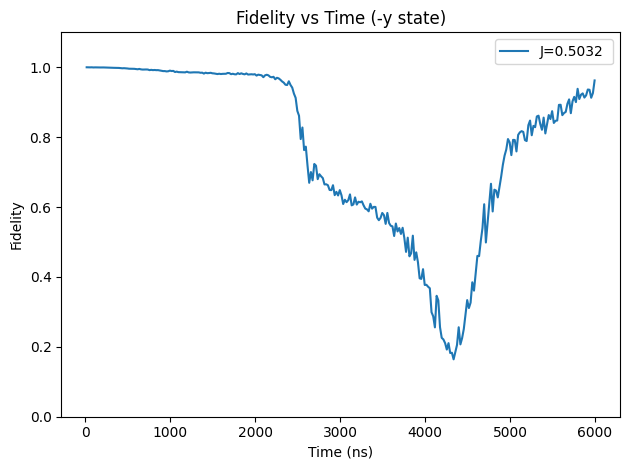

In [14]:

F1=0.99
F2=0.99
# F_results = {} 
flattop_gauss_amp=0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1*flattop_gauss_amp)
state='-y'
# plt.figure(figsize=(7, 5))
amp='0.0015000'#'0.0001000', '0.0003000', '0.0005000', '0.0007193', '0.0010000', '0.0015000', '0.0050000', '0.0100000', '0.0300000'
psi_e = density_dict['e'][amp]['psis']
psi_f = density_dict['f'][amp]["psis"]   
psi = density_dict[state][amp]["psis"] 
time=density_dict[state][amp]["time"]
psi_e= enforce_continuous_phase(psi_e,0)
psi_f= enforce_continuous_phase(psi_f,1)
if state == '-x' or state == 'x':
    phi_ts,F_plus,idx= build_phi_filtered_x(psi_e, psi_f,time,state,F1,F2)
elif state == '-y' or state == 'y':
    phi_ts,F_plus,idx= build_phi_filtered_y(psi_e, psi_f,time,state,F1,F2)
# print(F_plus)
psi=psi[idx]
time=time[idx]
ofs = compute_ofs(psi, phi_ts)
plt.plot(time,abs(ofs),label=f'J={float(amp)*a_to_J:.4f} ')
plt.xlabel('Time (ns)')
plt.ylabel('Fidelity')
plt.title(f'Fidelity vs Time ({state} state)')
# plt.xlim(0,4000)
plt.ylim(0,1.1)
plt.legend()
plt.tight_layout()    
plt.show()
# F_results[amp] = {'F1': F1, 'F2': F2}
# print(F_results)
# with open('F_results_-x.pkl', 'wb') as f:
#     pickle.dump(F_results, f)

In [15]:
with open('F_results_-x.pkl', 'rb') as f:
    results = pickle.load(f)

flattop_gauss_amp = 0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1 * flattop_gauss_amp)

state="-y"
for amp in  plot_amps:
    if amp != '0.0000703':
        F1 = results[amp]['F1']
        F2 = results[amp]['F2']
        psi_e = density_dict['e'][amp]['psis']
        psi_f = density_dict['f'][amp]["psis"]   
        psi = density_dict[state][amp]["psis"] 
        time=density_dict[state][amp]["time"]
        psi_e= enforce_continuous_phase(psi_e,0)
        psi_f= enforce_continuous_phase(psi_f,1)
        # psi= enforce_continuous_phase(psi,1)#x is 0
        if state == '-x' or state == 'x':
            phi_ts,F_plus,idx= build_phi_filtered_x(psi_e, psi_f,time,state,F1,F2)
        elif state == '-y' or state == 'y':
            phi_ts,F_plus,idx= build_phi_filtered_y(psi_e, psi_f,time,state,F1,F2)
        psi=psi[idx]
        time=time[idx]/1000
        ofs = compute_ofs(psi, phi_ts)
        plt.plot(time,abs(ofs),label=f'J={float(amp)*a_to_J:.4f} ')
        # plt.plot(time,abs(ofs),label=rf'$J/J_0=${float(amp)*a_to_J/j0:.2f}', lw = 0.7)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Fidelity')

plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()
savefig_tight('Images/purestatefidelity-x.pdf')
plt.show()


NameError: name 'plot_amps' is not defined

In [ ]:
flattop_gauss_amp=0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1*flattop_gauss_amp)
state='x'
for amp in  plot_amps:
    if amp != '0.0000703':
        F1 = results[amp]['F1']
        F2 = results[amp]['F2']
        psi_e = density_dict['e'][amp]['psis']
        psi_f = density_dict['f'][amp]["psis"]   
        psi = density_dict[state][amp]["psis"] 
        time=density_dict[state][amp]["time"]
        psi_e= enforce_continuous_phase(psi_e,0)
        psi_f= enforce_continuous_phase(psi_f,1)
        # psi= enforce_continuous_phase(psi,1)#x is 0
        if state == '-x' or state == 'x':
            phi_ts,F_plus,idx= build_phi_filtered_x(psi_e, psi_f,time,state,F1,F2)
        elif state == '-y' or state == 'y':
            phi_ts,F_plus,idx= build_phi_filtered_y(psi_e, psi_f,time,state,F1,F2)
        psi=psi[idx]
        time=time[idx]/1000
        ofs = compute_ofs(psi, phi_ts)
        plt.plot(time,abs(ofs),label=rf'$J=${float(amp)*a_to_J:.2f}', lw = 0.7)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Fidelity')


# plt.xlim(0,4000)
plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()
savefig_tight('Images/purestatefidelityx.pdf')
plt.show()


In [ ]:
flattop_gauss_amp=0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1*flattop_gauss_amp)
state='-y'
for amp in  plot_amps:
    if amp != '0.0000703':
        F1 = results[amp]['F1']
        F2 = results[amp]['F2']
        psi_e = density_dict['e'][amp]['psis']
        psi_f = density_dict['f'][amp]["psis"]   
        psi = density_dict[state][amp]["psis"] 
        time=density_dict[state][amp]["time"]
        psi_e= enforce_continuous_phase(psi_e,0)
        psi_f= enforce_continuous_phase(psi_f,1)
        # psi= enforce_continuous_phase(psi,1)#x is 0
        if state == '-x' or state == 'x':
            phi_ts,F_plus,idx= build_phi_filtered_x(psi_e, psi_f,time,state,F1,F2)
        elif state == '-y' or state == 'y':
            phi_ts,F_plus,idx= build_phi_filtered_y(psi_e, psi_f,time,state,F1,F2)
        psi=psi[idx]
        time=time[idx]/1000
        ofs = compute_ofs(psi, phi_ts)
        plt.plot(time,abs(ofs),label=rf'$J=${float(amp)*a_to_J:.2f}', lw = 0.7)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Fidelity')


plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()    
savefig_tight('Images/purestatefidelity-y.pdf')
plt.show()

In [ ]:
flattop_gauss_amp=0.1
a_to_J = ((2 * np.pi) / (2 * (2 * 46.8197 * 1e-3))) / (1*flattop_gauss_amp)
state='y'
for amp in  plot_amps:
    if amp != '0.0000703':
        F1 = results[amp]['F1']
        F2 = results[amp]['F2']
        psi_e = density_dict['e'][amp]['psis']
        psi_f = density_dict['f'][amp]["psis"]   
        psi = density_dict[state][amp]["psis"] 
        time=density_dict[state][amp]["time"]
        psi_e= enforce_continuous_phase(psi_e,0)
        psi_f= enforce_continuous_phase(psi_f,1)
        # psi= enforce_continuous_phase(psi,1)#x is 0
        if state == '-x' or state == 'x':
            phi_ts,F_plus,idx= build_phi_filtered_x(psi_e, psi_f,time,state,F1,F2)
        elif state == '-y' or state == 'y':
            phi_ts,F_plus,idx= build_phi_filtered_y(psi_e, psi_f,time,state,F1,F2)
        psi=psi[idx]
        time=time[idx]/1000
        ofs = compute_ofs(psi, phi_ts)
        plt.plot(time,abs(ofs),label=rf'$J=${float(amp)*a_to_J:.2f}', lw = 0.7)
plt.xlabel(r'Time [$\mu$s]')
plt.ylabel('Fidelity')
plt.title(f'Fidelity vs Time ({state} state)')

# plt.xlim(0,4000)
plt.ylim(0,1.05)
plt.legend()
plt.tight_layout()  
savefig_tight('Images/purestatefidelityy.pdf')
plt.show()